# Data exploration

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

## Loading Datasets

In [2]:
df_train=pd.read_csv("train_users.csv")
df_test=pd.read_csv("test_users.csv")
df_session=pd.read_csv('sessions.csv')

In [5]:
df = pd.concat((df_train, df_test),axis=0, ignore_index=True)

C:\Users\Laura.Taddei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
df.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [10]:
# Missing values
display(df.isnull().sum())

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [14]:
df.shape

(275547, 16)

## Explore Data

### Language

In [17]:
# users'language
df_lan=df.groupby('language').size().reset_index(name='counts').sort_values('counts', ascending=False).reset_index(drop=True)
percent=pd.DataFrame((df_lan['counts']/df_lan['counts'].sum())*100)
percent=percent.rename(columns={"counts": "Percent"})
pd.concat([df_lan, percent], axis=1)

,language,counts,Percent
0,en,262678,96.373669
1,zh,2623,0.962350
2,fr,1470,0.539327
3,es,1159,0.425224
4,ko,1100,0.403578
5,de,972,0.356616
6,it,624,0.228939
7,ru,494,0.181243
8,ja,343,0.125843
9,pt,317,0.116304


### Age

In [18]:
# users'Age
df['age'].isna().sum()

119851

In [19]:
df['age'].describe()

count    155696.000000
mean         36.028536
std          11.544755
min          18.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

In [20]:
# metto a null tutti quelli sopra ai 95 e sotto ai 18
df.loc[df['age']>95]=np.nan
df.loc[df['age']<18]=np.nan

In [21]:
df['age'].describe()

count    155696.000000
mean         36.028536
std          11.544755
min          18.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

In [22]:
#distribution
df_age=df.groupby('age').size().reset_index(name='counts').sort_values('counts', ascending=False).reset_index(drop=True)
percent=pd.DataFrame((df_age['counts']/df_age['counts'].sum())*100)
percent=percent.rename(columns={"counts": "Percent"})
df_age=pd.concat([df_age, percent], axis=1)
df_age['age']=df_age['age'].astype(int)

Text(0.5, 1.0, 'Distribution of Users Age')

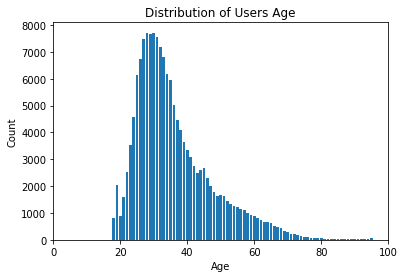

In [23]:
#Histogram
x=df_age['age']
y=df_age['counts']
plt.bar(x,y,align='center', alpha=1)
plt.xlim([0.0, 100.0])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Users Age')

### Gender

In [24]:
# Users Gender
#replace unknow with nan values
df['gender'].replace("-unknown-", np.nan, inplace=True)

# count
df_gen=df.groupby('gender').size().reset_index(name='counts').sort_values('counts', ascending=False).reset_index(drop=True)
percent=pd.DataFrame((df_gen['counts']/df_gen['counts'].sum())*100)
percent=percent.rename(columns={"counts": "Percent"})
pd.concat([df_gen, percent], axis=1).head()

,gender,counts,Percent
0,FEMALE,76303,53.012124
1,MALE,67302,46.758606
2,OTHER,330,0.229270


### Target: country_destination

In [25]:
# Users Destination - Target
df_country=df.groupby('country_destination').size().reset_index(name='counts').sort_values('counts', ascending=False).reset_index(drop=True)
percent=pd.DataFrame((df_country['counts']/df_country['counts'].sum())*100)
percent=percent.rename(columns={"counts": "Percent"})
pd.concat([df_country, percent], axis=1)

,country_destination,counts,Percent
0,NDF,123309,58.480472
1,US,61421,29.129497
2,other,9928,4.708449
3,FR,4961,2.352802
4,IT,2786,1.321287
5,GB,2285,1.083683
6,ES,2219,1.052382
7,CA,1406,0.666809
8,DE,1044,0.495127
9,NL,750,0.355695


Text(0.5, 1.0, 'Distribution of country_destination')

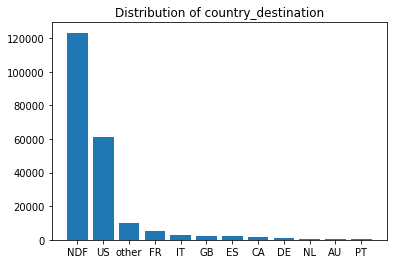

In [26]:
x=df_country['country_destination']
y=df_country['counts']
plt.bar(x,y, align='center', alpha=1)
plt.title('Distribution of country_destination')

### Country Destination vs. Age 

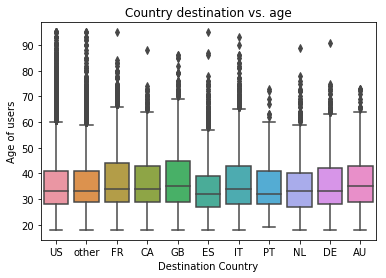

In [28]:
df_no_NDF=df[df['country_destination']!='NDF']

sns.boxplot(y='age' , x='country_destination', data=df_no_NDF)
plt.xlabel('Destination Country')
plt.ylabel('Age of users')
plt.title('Country destination vs. age')
plt.show()

### Signup Method

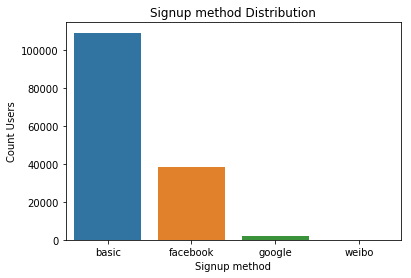

In [29]:
#signup method: canale attraverso il quale gli utenti si sono iscritti a Airbnb
sns.countplot(x='signup_method', data=df_no_NDF)
plt.xlabel('Signup method')
plt.ylabel('Count Users')
plt.title('Signup method Distribution')
plt.show()

### Country Destination vs. Signup Method

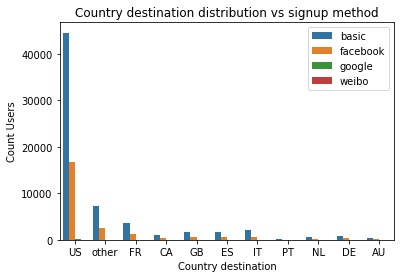

In [30]:
sns.countplot(x='country_destination', data=df_no_NDF, hue='signup_method')
plt.xlabel('Country destination')
plt.ylabel('Count Users')
plt.title('Country destination distribution vs signup method')
plt.legend(loc='upper right')
plt.show()

### Signup-App

No handles with labels found to put in legend.


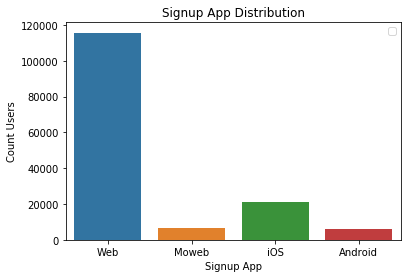

In [31]:
#signup app: app attraverso la quale un utente si è iscritto a Airbnb
sns.countplot(x='signup_app', data=df_no_NDF)
plt.xlabel('Signup App')
plt.ylabel('Count Users')
plt.title('Signup App Distribution')
plt.legend(loc='upper right')
plt.show()

### Country Destination vs Signup-App

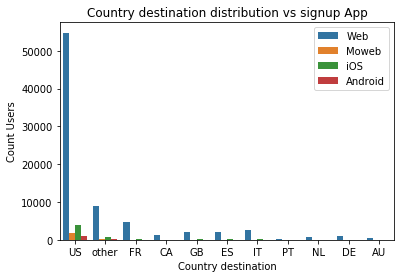

In [32]:
sns.countplot(x='country_destination', data=df_no_NDF, hue='signup_app')
plt.xlabel('Country destination')
plt.ylabel('Count Users')
plt.title('Country destination distribution vs signup App')
plt.legend(loc='upper right')
plt.show()

### Affiliate Channels

No handles with labels found to put in legend.


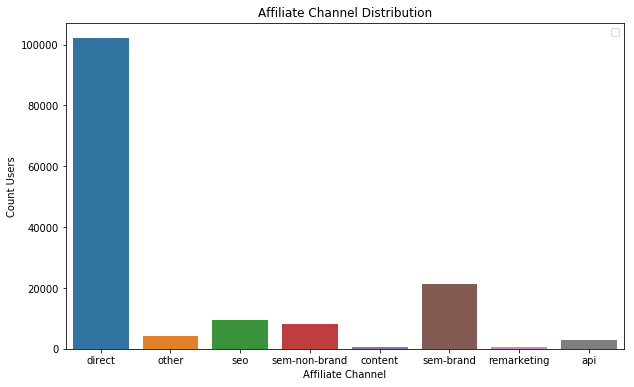

In [33]:
# affiliate channels
plt.figure(figsize=(10,6))
sns.countplot(x='affiliate_channel', data=df_no_NDF)
plt.xlabel('Affiliate Channel')
plt.ylabel('Count Users')
plt.title('Affiliate Channel Distribution')
plt.legend(loc='upper right')
plt.show()

### Country Destination vs Affiliate Channel

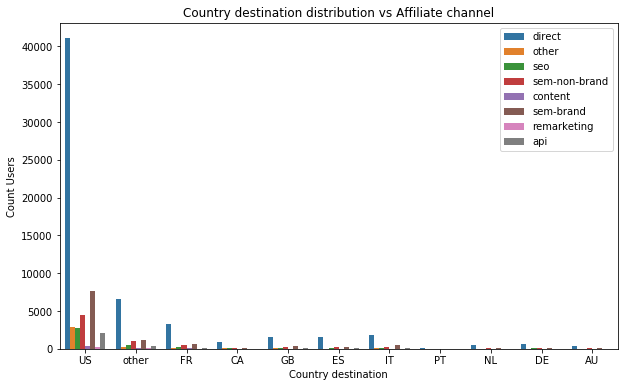

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='country_destination', data=df_no_NDF, hue='affiliate_channel')
plt.xlabel('Country destination')
plt.ylabel('Count Users')
plt.title('Country destination distribution vs Affiliate channel')
plt.legend(loc='upper right')
plt.show()

### First device Type

No handles with labels found to put in legend.


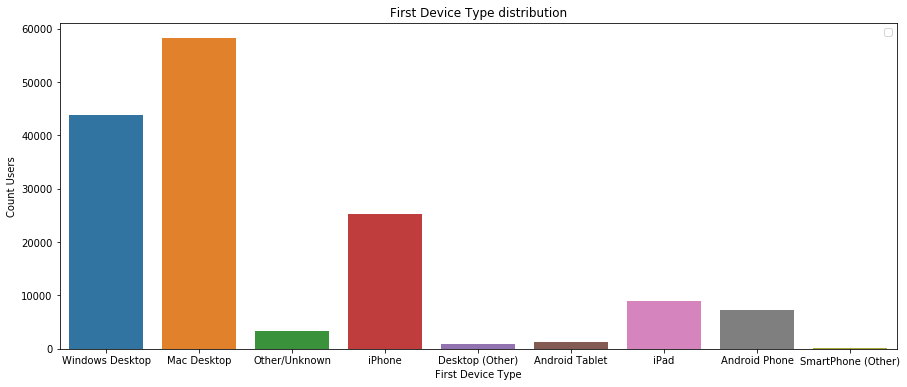

In [36]:
# first_device_type
plt.figure(figsize=(15,6))
sns.countplot(x='first_device_type', data=df_no_NDF)
plt.xlabel('First Device Type')
plt.ylabel('Count Users')
plt.title('First Device Type distribution')
plt.legend(loc='upper right')
plt.show()

### Country Destination vs. First Device Type

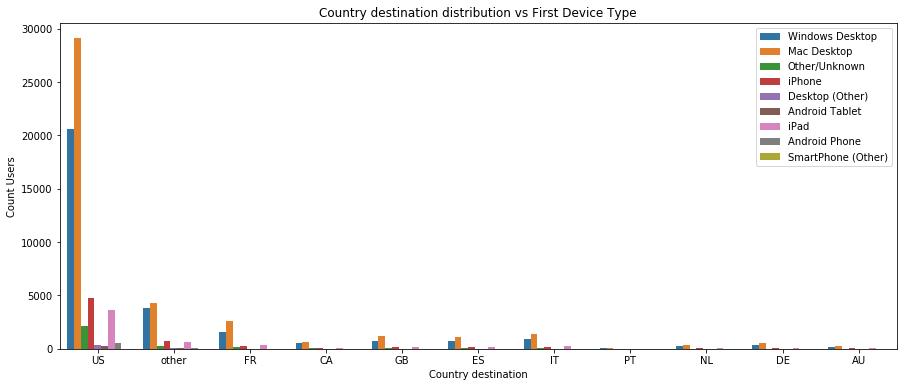

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(x='country_destination', data=df_no_NDF, hue='first_device_type')
plt.xlabel('Country destination')
plt.ylabel('Count Users')
plt.title('Country destination distribution vs First Device Type')
plt.legend(loc='upper right')
plt.show()

### First Browser

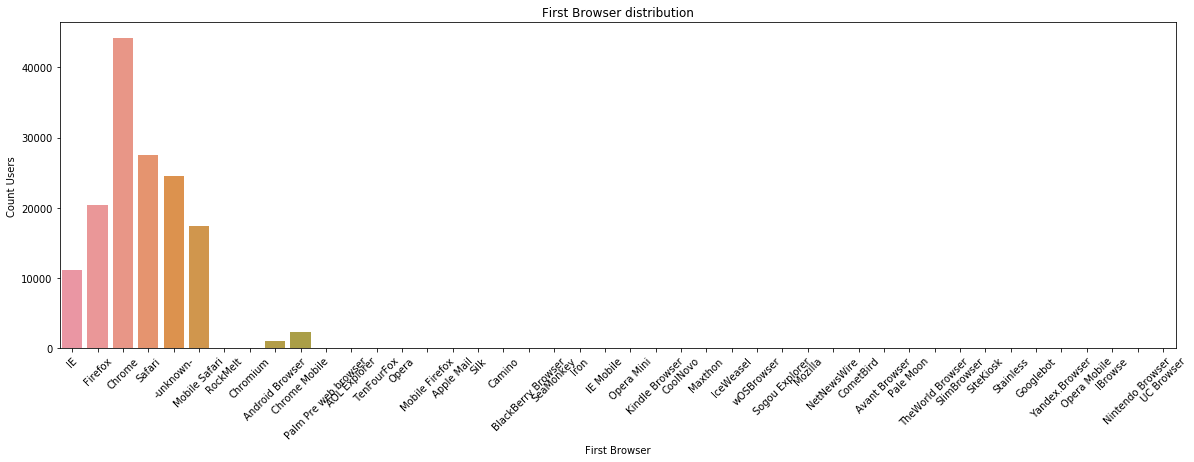

In [38]:
# first Browser
plt.figure(figsize=(20,6))
sns.countplot(x='first_browser', data=df_no_NDF)
plt.xlabel('First Browser')
plt.ylabel('Count Users')
plt.title('First Browser distribution')
plt.xticks(rotation=45)
plt.show()

### Dates

In [40]:
# dates: date_account_created
df_no_NDF['date_account_created']=pd.to_datetime(df_no_NDF['date_account_created'])
df_no_NDF.head()

C:\Users\Laura.Taddei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3.0,basic,2.009061e+13
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0.0,facebook,2.009103e+13
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0.0,basic,2.009121e+13
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,NaN,osr2jwljor,en,Web,0.0,basic,2.010010e+13
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0.0,basic,2.010010e+13


In [41]:
df_no_NDF['timestamp_first_active']=pd.to_datetime((df_no_NDF['timestamp_first_active'] // 1000000), format='%Y%m%d')

C:\Users\Laura.Taddei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_no_NDF_date=df_no_NDF.groupby('timestamp_first_active').size().reset_index(name='count')

C:\Users\Laura.Taddei\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


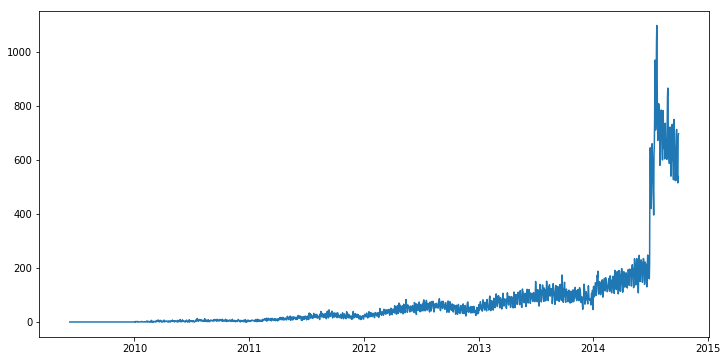

In [43]:
plt.figure(figsize=(12,6))
x=df_no_NDF_date['timestamp_first_active']
y=df_no_NDF_date['count']

plt.plot(x, y)

In [ ]:
#date account created
df_no_NDF_date_acc=df_no_NDF.groupby('date_account_created').size().reset_index(name='count')
df_no_NDF_date_acc.head()

plt.figure(figsize=(12,6))
x=df_no_NDF_date_acc['date_account_created']
y=df_no_NDF_date_acc['count']

plt.plot(x, y)

### Session

In [45]:
df_session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [46]:
df_session.shape

(10567737, 6)

In [47]:
df_session=df_session.rename(columns={"user_id":"id"})

In [48]:
# count distinct values
df_session['id'].nunique()

135483

In [49]:
# count null
df_session.isnull().sum()

id                 34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [52]:
df_session['action_type'].replace('-unknown-', np.nan, inplace = True)

### Action Type

In [53]:
df_session['action_type'].value_counts()

view                3560902
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

### Action

In [54]:
#action
df_session['action'].unique()

array(['lookup', 'search_results', 'personalize', 'index',
       'similar_listings', 'ajax_refresh_subtotal', 'show',
       'header_userpic', 'ask_question', nan,
       'other_hosting_reviews_first', 'hosting_social_proof',
       'decision_tree', 'recent_reservations', 'faq_experiment_ids',
       'multi', 'active', 'dashboard', 'create', 'confirm_email',
       'show_personalize', 'verify', 'pending', 'requested', 'concierge',
       'faq', 'clear_reservation', 'cancellation_policies',
       'track_page_view', 'update', 'my', 'campaigns', 'notifications',
       'listings', 'unavailabilities', 'ajax_lwlb_contact',
       'ajax_check_dates', 'qt2', 'request_new_confirm_email',
       'ajax_photo_widget_form_iframe', 'facebook_auto_login', 'identity',
       'qt_reply_v2', 'travel_plans_current', 'complete_status',
       'populate_from_facebook', 'kba_update', 'kba', 'login',
       'authenticate', 'calendar_tab_inner2', 'other_hosting_reviews',
       'social_connections', 'relat

In [55]:
df_session['action'].value_counts()

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
                              ...   
acculynk_bin_check_failed          1
events                             1
deactivate                         1
deauthorize                        1
update_message                     1
Name: action, Length: 359, dtype: int64

### Action Detail

In [56]:
# action detail
df_session['action_detail'].value_counts()

view_search_results         1776885
p3                          1376550
-unknown-                   1031141
wishlist_content_update      706824
user_profile                 656839
                             ...   
special_offer_field               3
host_respond_page                 2
host_refund_guest                 2
tos_2014                          2
host_standard_suspension          1
Name: action_detail, Length: 155, dtype: int64

In [57]:
df_session['action_detail'].replace('-unknown-', np.nan, inplace=True)

In [58]:
df_session['action_detail'].value_counts()

view_search_results            1776885
p3                             1376550
wishlist_content_update         706824
user_profile                    656839
change_trip_characteristics     487744
                                ...   
special_offer_field                  3
host_respond_page                    2
host_refund_guest                    2
tos_2014                             2
host_standard_suspension             1
Name: action_detail, Length: 154, dtype: int64

### Device Type

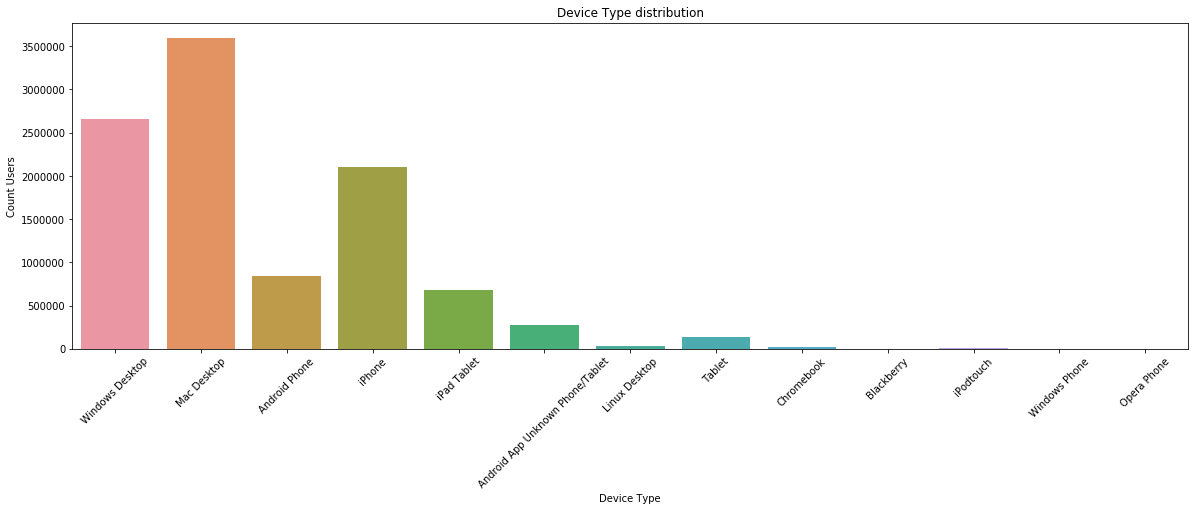

In [59]:
# Device Type
df_session['device_type'].replace('-unknown-', np.nan, inplace=True)
df_session_dev=df_session.groupby('device_type').size().reset_index(name='counts').sort_values('counts', ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,6))
sns.countplot(x='device_type',data=df_session)
plt.xlabel('Device Type')
plt.ylabel('Count Users')
plt.title('Device Type distribution')
plt.xticks(rotation=45)
plt.show()